In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install required libraries (if not already installed)
!pip install tensorflow opencv-python-headless scikit-learn seaborn matplotlib numpy

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Copy the zip file from Google Drive to Colab
!cp "/content/drive/My Drive/Final Dataset of Telugu Handwritten Chararcters.zip" /content/

# Unzip the dataset
!unzip "/content/Final Dataset of Telugu Handwritten Chararcters.zip" -d /content/telugu_dataset

# Function to load images from the dataset
def load_images_from_folder(base_path):
    images = []
    labels = []
    label_map = {}
    class_idx = 0

    for main_folder in ['achulu', 'Guninthamulu', 'hallulu', 'othulu']:
        main_path = os.path.join(base_path, main_folder)
        for subfolder in os.listdir(main_path):
            subfolder_path = os.path.join(main_path, subfolder)
            if os.path.isdir(subfolder_path) and os.listdir(subfolder_path):
                if subfolder not in label_map:
                    label_map[subfolder] = class_idx
                    class_idx += 1
                for img_name in os.listdir(subfolder_path):
                    if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                        img_path = os.path.join(subfolder_path, img_name)
                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if img is not None:
                            img = cv2.resize(img, (32, 32))
                            images.append(img)
                            labels.append(label_map[subfolder])
    return np.array(images), np.array(labels), label_map

# Load the dataset
base_path = '/content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/'
images, labels, label_map = load_images_from_folder(base_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the images
X_test = X_test / 255.0

print(f"Number of test images: {len(X_test)}")
print(f"Number of classes: {len(label_map)}")

Streaming output truncated to the last 5000 lines.
  inflating: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/s/A_0_34.jpeg  
  inflating: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/s/A_0_3412.jpeg  
  inflating: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/s/A_0_3425.jpeg  
  inflating: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/s/A_0_343.jpeg  
  inflating: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/s/A_0_3437.jpeg  
  inflating: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/s/A_0_3474.jpeg  
  inflating: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/s/A_0_3478.jpeg  
  inflating: /content/telugu_dataset/Final Dataset of Telugu Handwritten Chararcters/Test1/othulu/s/A_0_349.jpeg  
  inflating: /content/tel

In [9]:
import tensorflow as tf
import pickle

# Load the saved model
model_path = '/content/drive/My Drive/telugu_character_recognition_model_finetuned.keras'
model = tf.keras.models.load_model(model_path)

# Load the saved label_map
label_map_path = '/content/drive/My Drive/label_map.pkl'
with open(label_map_path, 'rb') as f:
    label_map = pickle.load(f)

print("Model and label_map loaded successfully.")
print("Sample of label map:", list(label_map.items())[:5])

Model and label_map loaded successfully.
Sample of label map: [('ah', 0), ('ii', 1), ('ru', 2), ('e', 3), ('uu', 4)]


In [37]:
# Define English-to-Telugu mapping
english_to_telugu = {
    'a': 'అ', 'aa': 'ఆ', 'ah': 'అః', 'ai': 'ఐ', 'am': 'అం', 'ao': 'ఔ',
    'e': 'ఎ', 'ee': 'ఈ', 'i': 'ఎ', 'ii': 'ఏ', 'o': 'ఒ', 'oo': 'ఓ',
    'ru': 'ఋ', 'ruu': 'ౠ', 'u': 'ఉ', 'uu': 'ఊ',
    'ana': 'ణ', 'ba': 'బ', 'bha': 'భ', 'ch': 'చ', 'cha': 'ఛ',
    'd': 'డ', 'da': 'ద', 'dh': 'ఢ', 'dha': 'ధ', 'ga': 'గ', 'gha': 'ఘ',
    'ha': 'హ', 'ja': 'జ', 'jh': 'ఝ', 'kha': 'ఖ', 'ksh': 'క్ష',
    'I': 'ఇ', 'II': 'ఈ', 'ma': 'మ', 'na': 'న', 'pa': 'ప', 'pha': 'ఫ',
    'ra': 'ర', 'RR': 'ఱ', 'sa': 'స', 'sh': 'శ', 'sha': 'ష', 'ta': 'ట',
    'th': 'ఠ', 'tha': 'త', 'tt': 'ట్ట', 'va': 'వ', 'ya': 'య',
    'b': 'బ', 'bh': 'భ', 'g': 'గ', 'gh': 'ఘ', 'h': 'హ', 'in': 'న',
    'jha': 'ఝ', 'ka': 'క', 'ks': 'క్ష', 'm': 'మ', 'n': 'న', 'P': 'ప',
    'ph': 'ఫ', 'r': 'ర', 'rr': 'ఱ', 's': 'స', 'v': 'వ', 'y': 'య',
    'thah': 'థ', 'an': 'అం', 'c': 'చ', 'j': 'జ', 'k': 'క', 'kh': 'ఖ',
    'nn': 'ణ', 'pph': 'ఫ', 'z': 'జ','l': 'ల','ll': 'ళ','nga': 'ఙ', 'nya': 'ఞ','Ph': 'ఫ',
    'jna': 'జ్ఞ'
}

# Prediction function with confidence and graph
def predict_image(img_path, model, label_map, english_to_telugu, top_n=5):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to load test image: {img_path}")
        return None, None, None
    img = cv2.resize(img, (32, 32)) / 255.0
    img = img.reshape(1, 32, 32, 1)
    pred = model.predict(img)[0]
    pred_class = np.argmax(pred)
    confidence = pred[pred_class] * 100
    inv_label_map = {v: k for k, v in label_map.items()}
    english_label = inv_label_map[pred_class]
    telugu_label = english_to_telugu.get(english_label, english_label)
    top_indices = np.argsort(pred)[-top_n:][::-1]
    top_probs = pred[top_indices] * 100
    top_english_labels = [inv_label_map[idx] for idx in top_indices]
    top_telugu_labels = [english_to_telugu.get(label, label) for label in top_english_labels]
    plt.figure(figsize=(10, 5))
    plt.bar(top_telugu_labels, top_probs, color='skyblue')
    plt.xlabel('Telugu Characters')
    plt.ylabel('Confidence (%)')
    plt.title(f'Top {top_n} Predictions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return telugu_label, confidence, pred

print("Prediction function defined.")

Prediction function defined.


In [38]:
# Reshape X_test for the model (add channel dimension)
X_test = X_test.reshape(-1, 32, 32, 1)

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

print("Predictions completed.")

298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predictions completed.


Confusion Matrix:
[[78  0  0 ...  0  0  0]
 [ 0 76  0 ...  0  0  0]
 [ 0  0 89 ...  0  0  0]
 ...
 [ 0  0  0 ... 49  0  0]
 [ 0  0  0 ...  0 99  0]
 [ 0  0  0 ...  0  0 66]]


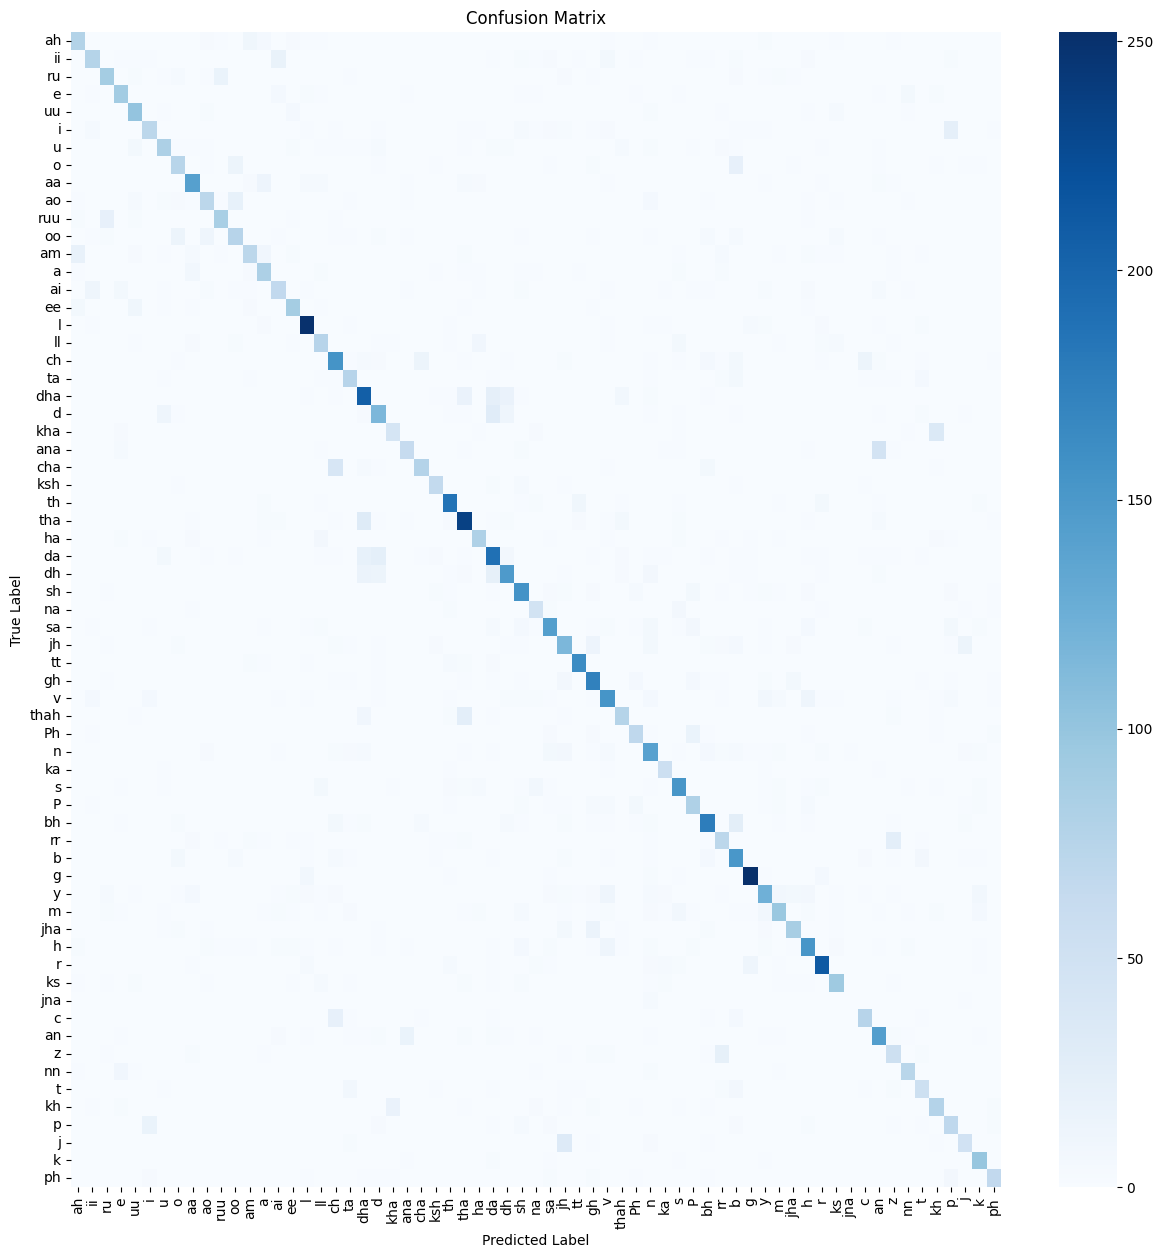

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Get the unique classes in y_test
unique_classes = np.unique(y_test)

# Use the label_map to get the class names, but filter to only those in y_test
class_names_all = [label for label, idx in sorted(label_map.items(), key=lambda x: x[1])]
class_names = [class_names_all[i] for i in unique_classes]

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [40]:
from sklearn.metrics import classification_report
import numpy as np

# Get the unique classes in y_test
unique_classes = np.unique(y_test)
print(f"Number of unique classes in y_test: {len(unique_classes)}")

# Use the label_map to get the class names, but filter to only those in y_test
class_names_all = [label for label, idx in sorted(label_map.items(), key=lambda x: x[1])]
class_names = [class_names_all[i] for i in unique_classes]
print(f"Number of classes in filtered class_names: {len(class_names)}")

# Generate a classification report
report = classification_report(y_test, predicted_classes, target_names=class_names)
print("Classification Report:")
print(report)

# Find the most confused pairs (off-diagonal elements)
conf_matrix_no_diag = conf_matrix.copy()
np.fill_diagonal(conf_matrix_no_diag, 0)  # Set diagonal to 0 to ignore correct predictions
max_confusion_idx = np.unravel_index(np.argmax(conf_matrix_no_diag), conf_matrix.shape)
true_label = class_names[max_confusion_idx[0]]
pred_label = class_names[max_confusion_idx[1]]
num_confusions = conf_matrix_no_diag[max_confusion_idx]
print(f"Most confused pair: True label '{true_label}' ({english_to_telugu[true_label]}) "
      f"predicted as '{pred_label}' ({english_to_telugu[pred_label]}) "
      f"with {num_confusions} misclassifications.")

Number of unique classes in y_test: 65
Number of classes in filtered class_names: 65
Classification Report:
              precision    recall  f1-score   support

          ah       0.70      0.72      0.71       108
          ii       0.74      0.63      0.68       121
          ru       0.72      0.71      0.72       125
           e       0.75      0.80      0.77       114
          uu       0.75      0.86      0.80       118
           i       0.72      0.59      0.65       121
           u       0.73      0.69      0.71       120
           o       0.66      0.62      0.64       120
          aa       0.81      0.79      0.80       180
          ao       0.71      0.62      0.66       114
         ruu       0.80      0.75      0.78       114
          oo       0.64      0.60      0.62       125
          am       0.73      0.57      0.64       124
           a       0.67      0.77      0.72       108
          ai       0.65      0.62      0.63       107
          ee       0.81    

In [42]:
import numpy as np


unique_classes = np.unique(y_test)
class_names_all = [label for label, idx in sorted(label_map.items(), key=lambda x: x[1])]
class_names = [class_names_all[i] for i in unique_classes]

# Initialize counters
num_classes_correct = 0  # Classes with at least one correct prediction (TP > 0)
num_classes_incorrect = 0  # Classes with no correct predictions (TP = 0)
total_correct_predictions = 0  # Total number of correct predictions (sum of TPs)
total_incorrect_predictions = 0  # Total number of incorrect predictions (sum of FPs + FNs)

# Lists to store per-class metrics
per_class_metrics = []

# Calculate TP, FP, FN, TN for each class
for i, class_name in enumerate(class_names):
    # True Positives (TP): Correct predictions for this class (diagonal element)
    TP = conf_matrix[i, i]

    # False Positives (FP): Sum of predictions for this class that were incorrect (column i, excluding diagonal)
    FP = np.sum(conf_matrix[:, i]) - TP

    # False Negatives (FN): Sum of actual instances of this class predicted as other classes (row i, excluding diagonal)
    FN = np.sum(conf_matrix[i, :]) - TP

    # True Negatives (TN): All other predictions that correctly did not predict this class
    TN = np.sum(conf_matrix) - (TP + FP + FN)

    # Total correct and incorrect predictions for this class
    correct_predictions = TP
    incorrect_predictions = FP + FN

    # Update counters
    if TP > 0:
        num_classes_correct += 1
    else:
        num_classes_incorrect += 1

    total_correct_predictions += TP
    total_incorrect_predictions += incorrect_predictions

    # Store metrics for this class (without telugu_char)
    per_class_metrics.append({
        'class': class_name,
        'TP': TP,
        'FP': FP,
        'FN': FN,
        'TN': TN,
        'correct_predictions': correct_predictions,
        'incorrect_predictions': incorrect_predictions
    })

# Print summary
print(f"Number of classes with at least one correct prediction (TP > 0): {num_classes_correct}")
print(f"Number of classes with no correct predictions (TP = 0): {num_classes_incorrect}")
print(f"Total correct predictions (sum of TPs): {total_correct_predictions}")
print(f"Total incorrect predictions (sum of FPs + FNs): {total_incorrect_predictions}")

# Print detailed per-class metrics with improved formatting
print("\nPer-Class Metrics:")
print(f"{'Class':<10}{'TP':<8}{'FP':<8}{'FN':<8}{'TN':<8}{'Correct':<10}{'Incorrect':<10}")
for metrics in per_class_metrics:
    print(f"{metrics['class']:<10}{metrics['TP']:<8}{metrics['FP']:<8}{metrics['FN']:<8}{metrics['TN']:<8}{metrics['correct_predictions']:<10}{metrics['incorrect_predictions']:<10}")

Number of classes with at least one correct prediction (TP > 0): 64
Number of classes with no correct predictions (TP = 0): 1
Total correct predictions (sum of TPs): 7020
Total incorrect predictions (sum of FPs + FNs): 4992

Per-Class Metrics:
Class     TP      FP      FN      TN      Correct   Incorrect 
ah        78      33      30      9375    78        63        
ii        76      27      45      9368    76        72        
ru        89      34      36      9357    89        70        
e         91      31      23      9371    91        54        
uu        101     34      17      9364    101       51        
i         71      27      50      9368    71        77        
u         83      30      37      9366    83        67        
o         74      38      46      9358    74        84        
aa        142     34      38      9302    142       72        
ao        71      29      43      9373    71        72        
ruu       86      21      28      9381    86        49        
